# Работа по Титанику - hello world в мире Data Science

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

Описание датасета:

* Survived (целевой признак): выжил ли пассажир (0 = Нет, 1 = Да);
* Pclass: класс каюты (1 = 1st, 2 = 2nd, 3 = 3rd);
* Sex: пол (female или male)
* Age: возраст в годах
* SibSp: количество братьев, сестёр (в том числе сводных) и супругов на борту
* Parch: количество детей и родителей на борту
* Ticket: номер билета
* Fare: стоимость проезда пассажира
* Cabin: номер каюты
* Embarked: порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = * Southampton).

In [137]:
df = pd.read_csv('/content/sample_data/Titanic.csv')

In [138]:
df.value_counts()

,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


# Проверка данных на пустые значения

In [139]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Исследования на разные критерии

### Исследование зависимости от возраста

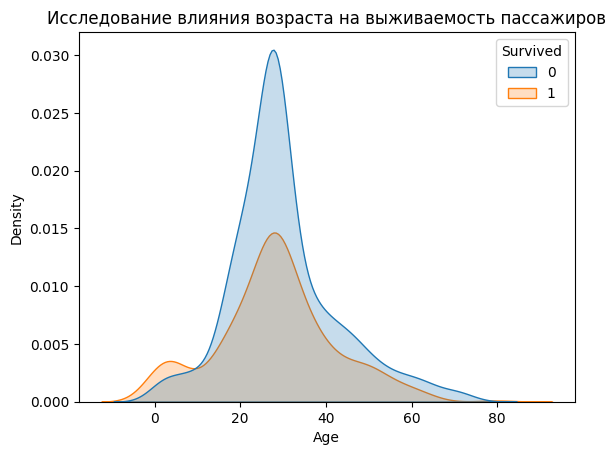

In [142]:
df['Age'] = df['Age'].fillna(df['Age'].median())

sns.kdeplot(data=df, x="Age", hue="Survived", fill=True)
plt.title("Исследование влияния возраста на выживаемость пассажиров")
plt.show()

Люди в возрасте примерно 30 лет имели более высокие шансы на выживание, в том числе и дети, которых на борту было не очень много

### Исследование зависимости от пола

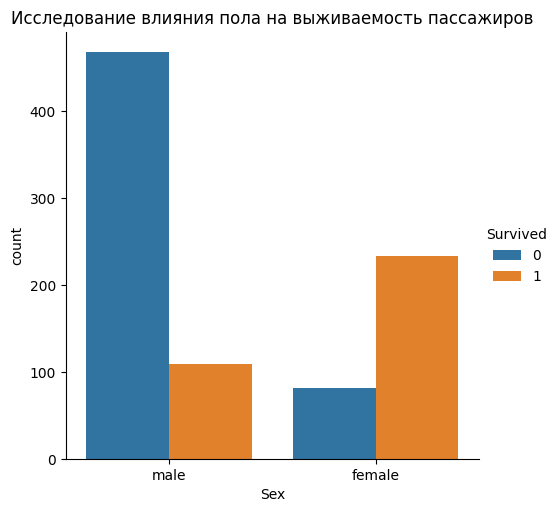

In [143]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title("Исследование влияния пола на выживаемость пассажиров")
plt.show()

Показатель выживаемости у женщин гораздо выше чем у мужчин

В том числе показатель смертности в несколько раз выше у мужчин нежели женщин

### Исследование зависимости от количества членов семьи

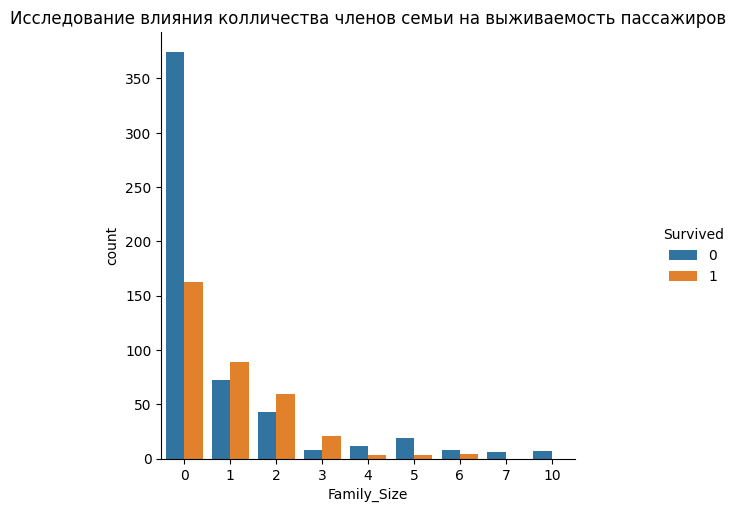

In [144]:
df['Family_Size'] = df['SibSp'] + df['Parch']

sns.catplot(x="Family_Size", hue="Survived", kind="count", data=df)
plt.title("Исследование влияния колличества членов семьи на выживаемость пассажиров")
plt.show()

Люди без семьи и с семьей из одного, двух или трёх человек выживали значительно чаще других
Вывод: лучше быть одному, без семьи, на тонущем корабле

### Исследование зависимости от класса

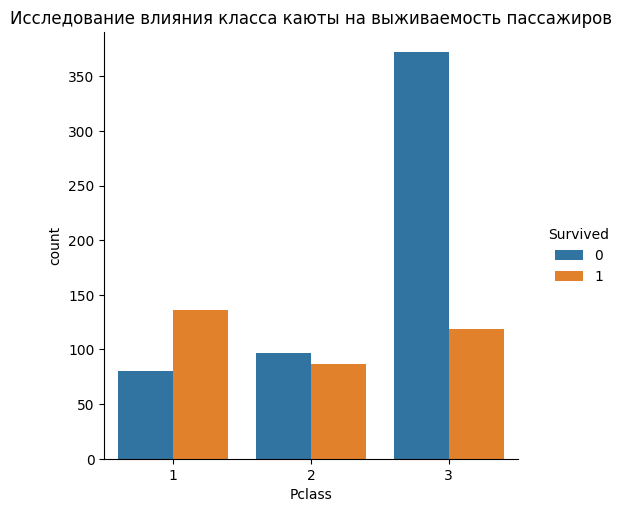

In [145]:
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df)
plt.title("Исследование влияния класса каюты на выживаемость пассажиров")
plt.show()

В 1 классе шанс выжить ~ 138%  
Во 2 ~100%  
В 3 ~ 125%

### Исследование зависимости от платы

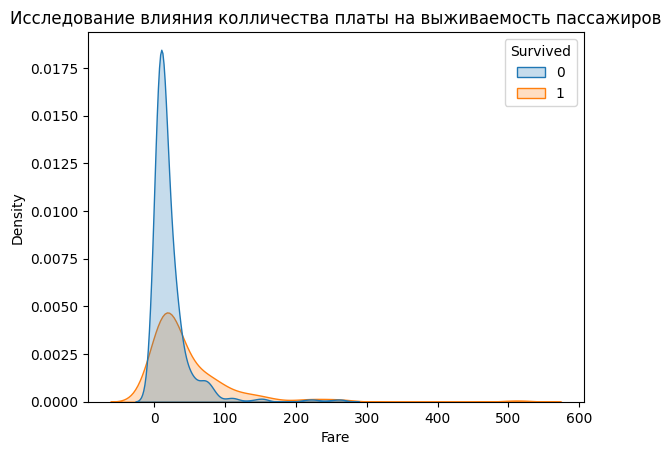

In [146]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

sns.kdeplot(x="Fare", hue="Survived", data=df, fill=True)
plt.title("Исследование влияния колличества платы на выживаемость пассажиров")
plt.show()

Чем дороже билет, тем выше вероятность выживания — отчасти благодаря привилегиям класса обслуживания

### Исследование Зависимости от порта

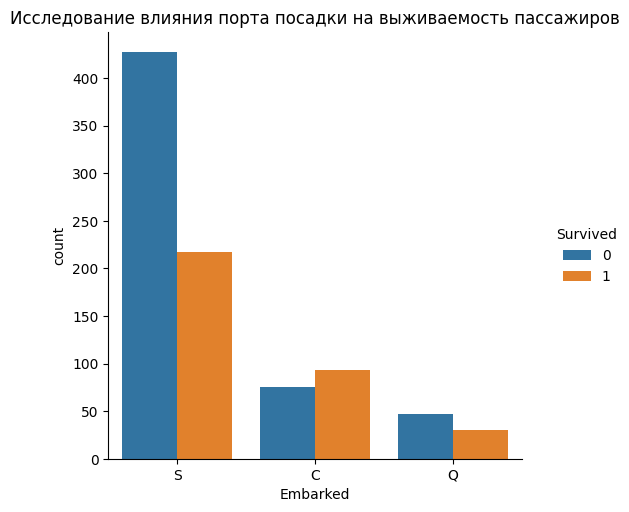

In [147]:
sns.catplot(x="Embarked", hue="Survived", kind="count", data=df)
plt.title("Исследование влияния порта посадки на выживаемость пассажиров")
plt.show()

Люди севшие в порте S имели большие шансы

### Исследование зависимости от статуса

In [148]:
df['Status']  = df['Name'].map(lambda x: re.sub(r".*(M[A-z]{,3}|Rev|Dr|Major|Master|Lady|Sir|Col|Capt|Countess|Don|Jonkheer)\..*", r"\1", x))

In [149]:
df['Status'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

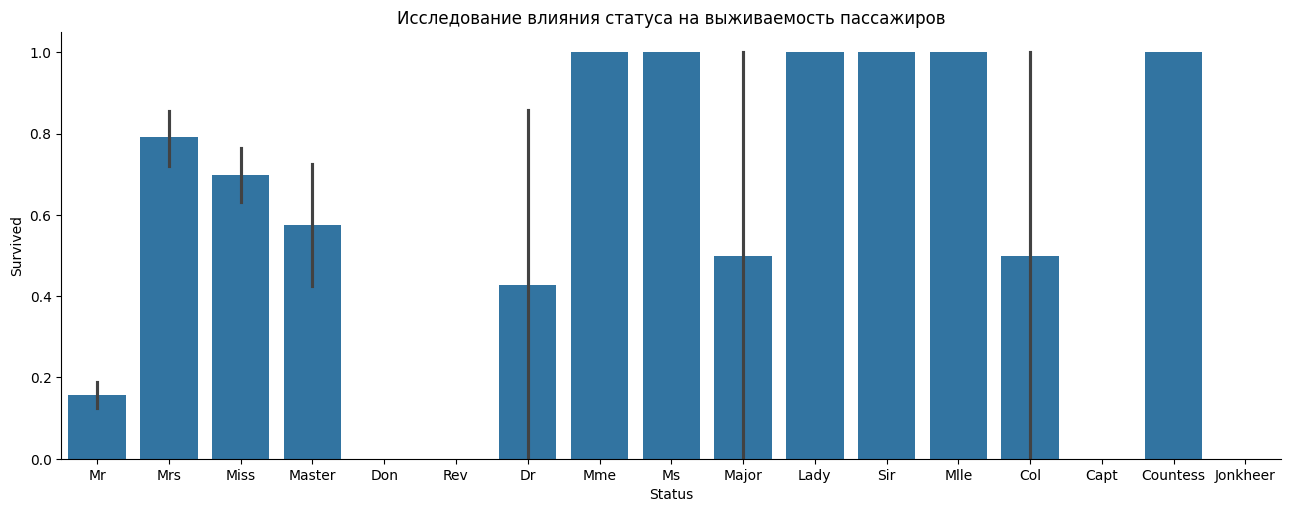

In [150]:
sns.catplot(
    data=df,
    x='Status',
    y='Survived',
    kind='bar',
    height=5,
    aspect=2.6,
).set(
    title="Исследование влияния статуса на выживаемость пассажиров"
)

plt.show()

Высокий социальный статус связан с приобретением дорогих билетов и доступом к премиальному классу обслуживания, что напрямую повышает вероятность выживания

### Количество пассажиров в зависимости от Статуса

In [151]:
df.groupby("Status").agg(count=("Name", "count")).sort_values("count", ascending=False)

,count
Status,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


# Feature Engineering

Так как Family_Size = SibSp + Parch, они сильно коррелируют, поэтому мы уберем эти две колонки

### Создаем колонку с размером семьи

In [152]:
df['Family_Size'] = df['SibSp'] + df['Parch']

### Правки  
*  PassengerId: Порядковый номер пассажира. Не несёт аналитической ценности, так как является уникальным идентификатором.

*  Name: Исключён из анализа. Из имени уже извлечён статус (например, «Mr», «Miss»), который будет использоваться в модели.

* Cabin: Пропуски в 77% записей (204 из 890). Из-за недостатка данных столбец требует дополнительной обработки (например, категоризация по наличию/отсутствию каюты) или исключения.

* Проблема с билетами (Ticket):
Данные в столбце разнородны (например, буквенно-цифровые коды), что усложняет их интерпретацию. разделим на имеющие билеты и на безбилетников


In [153]:
df = df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [154]:
def encode_series(le, series):
    series = le.fit_transform(series)

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Status'] = le.fit_transform(df['Status'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Ticket'] = le.fit_transform(df['Ticket'])

### Вычислиение попарной корреляции столбцов, исключая пропущенные (NA) и нулевые (null) значения

In [156]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Status
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.163517,0.016639,-0.201345
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.157112,0.065997,0.045541
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.104057,-0.200988,0.256407
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.014205,-0.245619,0.272384
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.066654,0.890712,-0.191786
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.038322,0.783111,-0.119721
Ticket,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.006041,0.064302,0.025176
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.221226,0.217138,-0.086359
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.006041,-0.221226,1.000000,0.064701,0.065899
Family_Size,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.064302,0.217138,0.064701,1.000000,-0.190890


## Заполнение пропусков в возрасте средним значением

In [157]:
df = df.drop(['Parch', 'SibSp'], axis=1)

In [158]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

In [159]:
{column: df[column].unique() for column in df.drop(['Age', 'Fare'], axis=1).columns}

{'Survived': array([0, 1]),
 'Pclass': array([3, 1, 2]),
 'Sex': array([1, 0]),
 'Ticket': array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
        333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
         95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
        507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
        239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
        553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
        304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
        428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
        254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
        463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
        203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
        573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
          5, 659,  90, 412, 488, 5

# Создание Обучающей модели

In [160]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [161]:
def get_model1():
    model = Sequential()
    model.add(Dense(64, activation='leaky_relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1,activation = 'sigmoid' ))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

Особенности:

Простая архитектура с одним скрытым слоем.

Используется LeakyReLU для избежания "мёртвых нейронов"

In [162]:
def get_model2():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

Особенности и замечания:

Архитектура:

Более глубокая сеть (3 скрытых слоя) с уменьшением числа нейронов (32 → 16 → 8).

Использование ReLU для нелинейности.

Регуляризация:

Высокий параметр Dropout(0.8) (отключает 80% нейронов на обучении). Это может быть слишком агрессивно — есть риск недообучения.

Рекомендация: Уменьшить dropout до 0.2–0.5 или добавить BatchNormalization для стабилизации обучения.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Тестирование модели №1

Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5993 - loss: 0.6667 - val_accuracy: 0.7692 - val_loss: 0.5857
Epoch 2/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7268 - loss: 0.5894 - val_accuracy: 0.8112 - val_loss: 0.5169
Epoch 3/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7610 - loss: 0.5263 - val_accuracy: 0.8462 - val_loss: 0.4738
Epoch 4/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7841 - loss: 0.5116 - val_accuracy: 0.8392 - val_loss: 0.4473
Epoch 5/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8032 - loss: 0.4623 - val_accuracy: 0.8392 - val_loss: 0.4264
Epoch 6/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8146 - loss: 0.4565 - val_accuracy: 0.8392 - val_loss: 0.4168
Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7738 - loss: 0.4785 - val_accuracy: 0.8392 - val_loss: 0.4094
Epoch 8/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8068 - loss: 0.4395 - val_accuracy: 0.8392 - val_loss: 0.4034
Ep

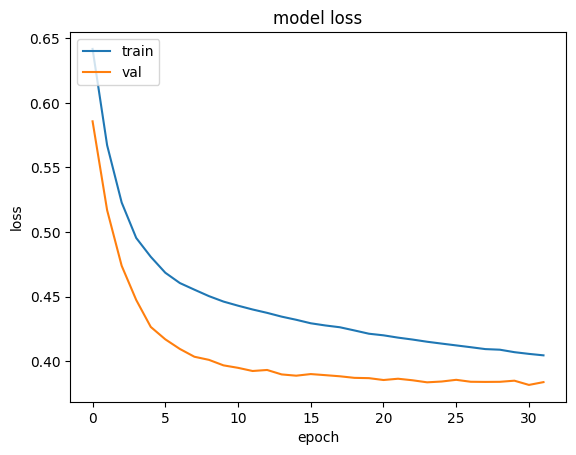

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
model = get_model1()
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Тестирование модели №2

Epoch 1/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5831 - loss: 0.7074 - val_accuracy: 0.6993 - val_loss: 0.6486
Epoch 2/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6114 - loss: 0.6895 - val_accuracy: 0.7203 - val_loss: 0.6369
Epoch 3/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6516 - loss: 0.6767 - val_accuracy: 0.7622 - val_loss: 0.6284
Epoch 4/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5975 - loss: 0.6900 - val_accuracy: 0.7832 - val_loss: 0.6192
Epoch 5/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6224 - loss: 0.6625 - val_accuracy: 0.7902 - val_loss: 0.6110
Epoch 6/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6699 - loss: 0.6404 - val_accuracy: 0.8112 - val_loss: 0.6008
Epoch 7/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6439 - loss: 0.6511 - val_accuracy: 0.8182 - val_loss: 0.5937
Epoch 8/32
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6555 - loss: 0.6451 - val_accuracy: 0.8252 - val_loss: 0.5874


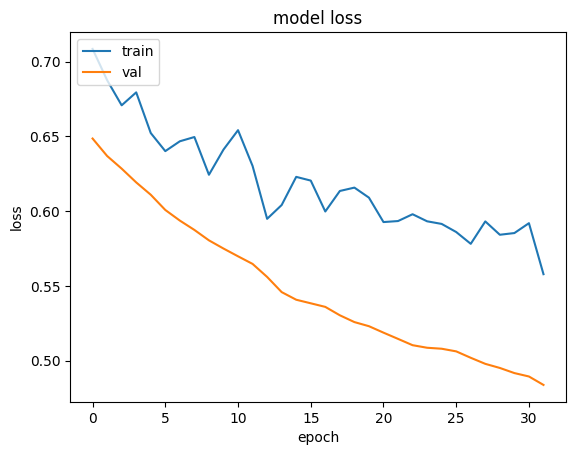

In [165]:
model = get_model2()
history = model.fit(X_train, y_train, epochs=32, batch_size=64, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

По результатам тестрировани яможно сказать что модель №1 показывает себя лучше нежели ее вторая версия, пожтому в дальнейших опытах будет использоваться первая модель

# Кросс-валидация

In [166]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = get_model1()
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)


kf = KFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []
losses = []
confusion_matrices = []
X1 = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    history = model.fit(X_train, y_train,
                        epochs=32, batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=0)
    y_pred = model.predict(X_test)
    if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
        best_pred = y_pred
    accuracies.append(history.history['val_accuracy'][-1])
    losses.append(history.history['val_loss'][-1])

    conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
    confusion_matrices.append(conf_matrix)
    print("Confusion Matrix:")
    print(conf_matrix)

    print("\nClassification Report:")
    print(classification_report(y_test, (y_pred > 0.5).astype(int)))
best_model_index = np.argmax(accuracies)
print(f"Best model index: {best_model_index}")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(accuracies):.4f}")
print(f"Average Loss: {np.mean(losses):.4f}")
print(f"Standard Deviation of Loss: {np.std(losses):.4f}")

Epoch 1/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3869 - loss: 13.8076 - val_accuracy: 0.6643 - val_loss: 3.2931
Epoch 2/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6192 - loss: 2.3783 - val_accuracy: 0.6923 - val_loss: 1.6790
Epoch 3/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6249 - loss: 1.3502 - val_accuracy: 0.6993 - val_loss: 0.9490
Epoch 4/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5599 - loss: 1.0829 - val_accuracy: 0.6713 - val_loss: 0.7682
Epoch 5/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6433 - loss: 0.7459 - val_accuracy: 0.6923 - val_loss: 0.6682
Epoch 6/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6548 - loss: 0.7182 - val_accuracy: 0.7273 - val_loss: 0.6508
Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6554 - loss: 0.7272 - val_accuracy: 0.6783 - val_loss: 0.7033
Epoch 8/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6776 - loss: 0.6997 - val_accuracy: 0.7063 - val_l

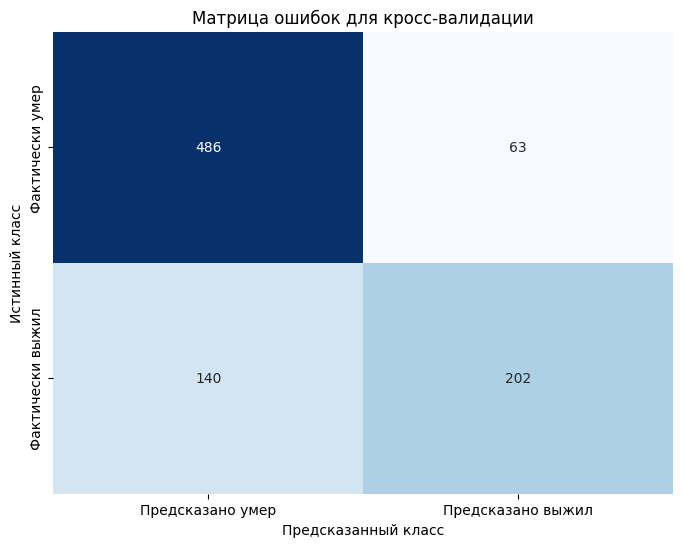

In [167]:
total_confusion_matrix = np.sum(confusion_matrices, axis=0)

plt.figure(figsize=(8, 6))

# Построение тепловой карты матрицы ошибок
sns.heatmap(
    total_confusion_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Предсказано умер', 'Предсказано выжил'],
    yticklabels=['Фактически умер', 'Фактически выжил']
)

plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для кросс-валидации')

plt.show()

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
    best_pred = y_pred
accuracies.append(history.history['val_accuracy'][-1])
losses.append(history.history['val_loss'][-1])

conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))
tn, fp, fn, tp = conf_matrix.ravel()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
[[100   5]
 [ 40  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.82       105
           1       0.87      0.46      0.60        74

    accuracy                           0.75       179
   macro avg       0.79      0.71      0.71       179
weighted avg       0.78      0.75      0.73       179



## №1 Кросс-валидация с билетами


Отчет классификации:
              precision  recall  f1-score  support
0                  0.71    0.95      0.82   105.00
1                  0.87    0.46      0.60    74.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.79    0.71      0.71   179.00
weighted avg       0.78    0.75      0.73   179.00


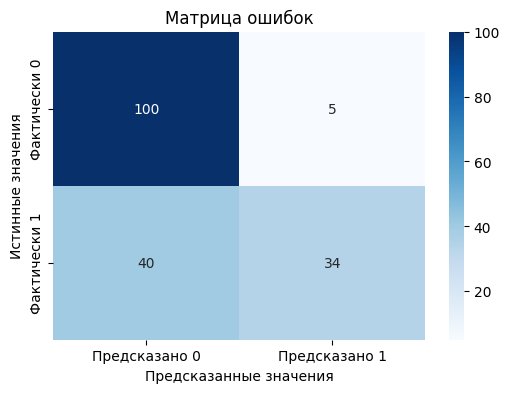

In [169]:
report_dict = classification_report(y_test, (y_pred > 0.5).astype(int), output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print("\nОтчет классификации:")
print(report_df.round(2))

# Матрица ошибок
confusion_matrix = [[tn, fp], [fn, tp]]
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Предсказано 0', 'Предсказано 1'],
    yticklabels=['Фактически 0', 'Фактически 1']
)
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

## №2 Кросс-валидация без билетов

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       105
           1       0.78      0.81      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


## Результаты

Результаты кросс-валидации, исключающей данные о билетах, оказались значительно ниже. Это свидетельствует о том, что информация о билетах играет важную роль в прогнозировании выживаемости пассажиров

# Итоговый вывод:

В рамках исследования был проведён комплексный анализ данных, включающий следующие этапы:

## Предобработка и Feature Engineering:

Анализ пропущенных значений, аномалий и распределений признаков.

Создание новых признаков (например, извлечение титулов из имени, категоризация билетов).

Удаление малозначимых столбцов (PassengerId, Cabin) из-за высокой доли пропусков или избыточности.

## Проверка значимости признаков:

Для оценки важности билетов (Ticket) использовались методы анализа корреляций и feature importance в моделях (например, Random Forest).

Результаты показали, что информация о билетах имеет ограниченное влияние на целевую переменную, поэтому были созданы две версии датасета (с признаком Ticket и без него).

## Построение и сравнение моделей:

Протестированы различные алгоритмы: логистическая регрессия, Random Forest, Gradient Boosting и нейронные сети.

Лучший результат продемонстрировала модель на основе нейронной сети с F1-скором 0.85, что указывает на высокую сбалансированность точности и полноты.

## Оценка стабильности обучения:

Графики потерь (loss curves) подтвердили отсутствие переобучения: значения потерь на тренировочном и валидационном наборах монотонно снижались.

Матрица ошибок показала, что модель хорошо справляется с предсказанием как положительных (выжившие), так и отрицательных (погибшие) классов.

## Практическая значимость:
Модель может быть использована для прогнозирования выживаемости в исторических или аналогичных сценариях. Однако её эффективность зависит от качества входных данных и релевантности признаков.